In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
#First we'll learn how to understand and make a KDE plot manually
#and then we'll see how to do it quickly with seaborn!

In [3]:
# Let's start off with a carpet/rug plot
# A rug plot simpot puts a tick wherever a value occured

#Create dataset with 52 data points
dataset = randn(52)

(0, 1)

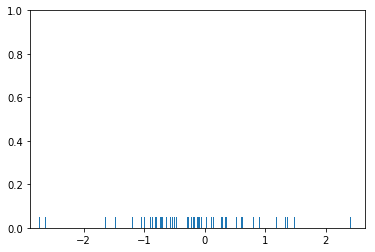

In [6]:
#Create rugplot with seaborn
sns.rugplot(dataset)
#Set y-axis limit on the rug plot
plt.ylim(0,1)
#every tick is a value in the dataset

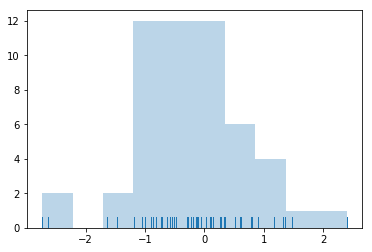

In [7]:
# Plot a histogram on top of a rug plot
#make it transparent: alpha = 0.3
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

In [8]:
#count the number of values (ticks) in each bin
#height of bin is the number of ticks in the bin

In [9]:
#The histogram sets up 10 bins and then just count how many ticks appeared in each bin, setting the height of each bar

#The kernel density plot will represent each tick mark with a gaussian basis function. Let's see how we would do this manually

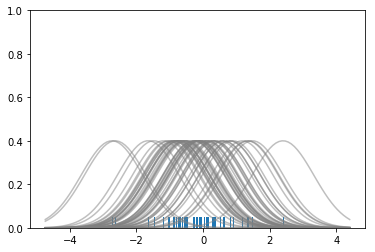

In [11]:
# Create another rugplot
sns.rugplot(dataset)

# Set up the x-axis for the plot (min and max values)
x_min = dataset.min() - 2 
x_max = dataset.max() + 2

# set x-asix to be 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'
#in wikipedia, find the practical bandwith estimation equation in the section "A rule-of-thumb bandwidth estimator"
# Silverman rule of thumb, aka Silverman bandwidth


#set up the bandwidth (Silverman bandwidth)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) **.02

# Create an empty kernel list
kernel_list = []
#make a for loop to build out that list

# Plot each basis function  (plot each kernel)
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    #pdf is propability density function (using the x_axis we created earlier)
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    #once we have that kernel,append it to the list we made
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    
    #resize everything by 40%
    kernel = kernel * .4
    
    #plot every kernel along the x_axis. Set color = grey. Make it transparent, alpha = 0.5
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
    #set a limit on y_axis: 0 to 1
    plt.ylim(0,1)


In [12]:
#they all peak at 0.4 (since we set them to be)
#normalize everything by the max value

Text(0.5,0.98,'Sum of the Basis Functions')

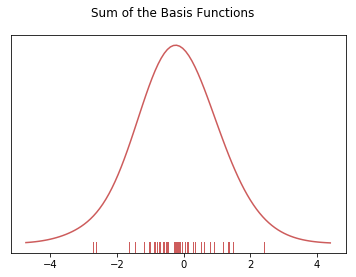

In [13]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure along the x_axis
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c='indianred')

# Get rid of y-tick marks: pass an empty list to method plt.yticks()
plt.yticks([])

# set title
plt.suptitle("Sum of the Basis Functions")

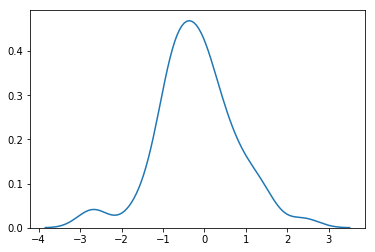

In [14]:
# Now we can see how to do all the above in one step with seaborn! Awesome!
sns.kdeplot(dataset)

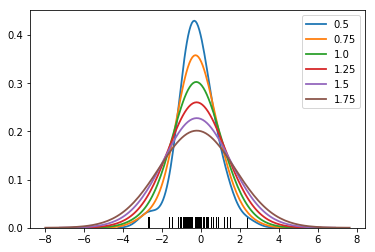

In [15]:
# We can adjust the bandwidth of the sns (seaborn) kde to make the kde plot more or less sensitive to high frequency

# make a Rugplot
sns.rugplot(dataset,color='black')

# Plot various bandwidths (bw)
# range from .5 to 2, in steps of 0.25
for bw in np.arange(.5,2,0.25):
    #for each bandwidth, make a KDE plot
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

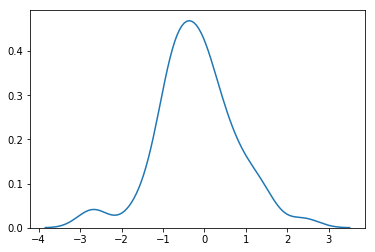

In [16]:
#with no bandwidth specified, seaborn will automatically get the bandwidth estimation
sns.kdeplot(dataset)

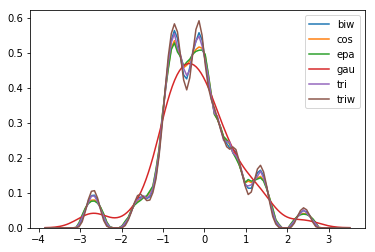

In [19]:
# We can also choose different types of kernels
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types: http://en.wikipedia.org/wiki/Kernel_(statistics)

#see how different functions work

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

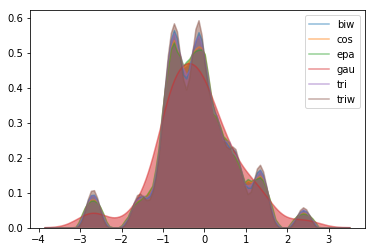

In [20]:
# We can also shade if desired: parameter shade=True
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

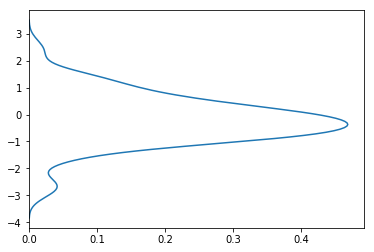

In [21]:
#plot on y-axis (vertical axis)
# For vertical axis, use the vertical keyword: vertical=True
sns.kdeplot(dataset,vertical=True)

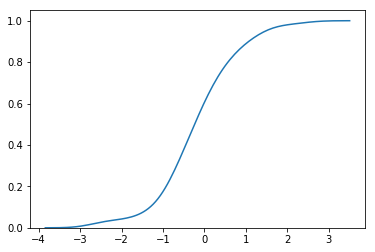

In [22]:
# Finally we can also use kde plot to create a "cumulative distribution function" (CDF) of the data

# URL for info on CDF: http://en.wikipedia.org/wiki/Cumulative_distribution_function

#use the cumulative keyword: cumulative=True
sns.kdeplot(dataset,cumulative=True)


In [23]:
#Multivariate Density Estimation using kdeplot

#We can also use kdeplot for multidimensional data (multi-variate density estimation). Lets see how it works!

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


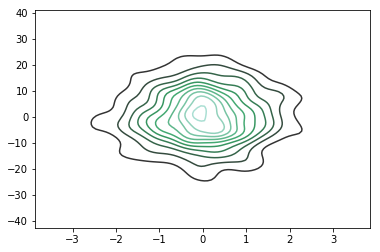

In [24]:
# Let's create a new dataset

# Mean: center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy package
#call method .multivariate_normal
#pass mean, covariance, size = 1000
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
#put data into a dataframe
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

#great thing: you are using Seaborn in perfect sync with a Pandas dataframe

# Plot our dataframe
sns.kdeplot(dframe)

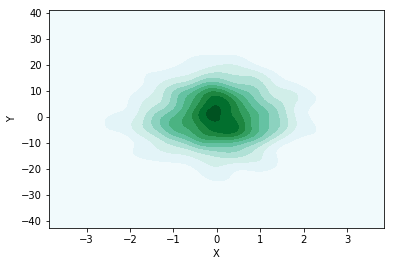

In [25]:
# We could have also passed two vectors seperately, and shade
# pass X and Y vectors of the dframe separately
sns.kdeplot(dframe.X,dframe.Y,shade=True)


/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


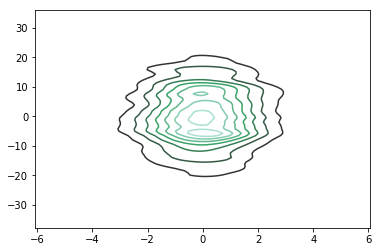

In [26]:
# Can specify a particular bandwidth
# for example, bw =1. See the heavy change
sns.kdeplot(dframe,bw=1)

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


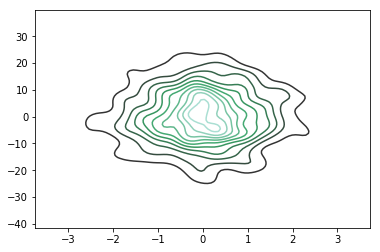

In [29]:
# Or just use silverman (rule of thumb) bandwidth again
sns.kdeplot(dframe,bw='silverman')

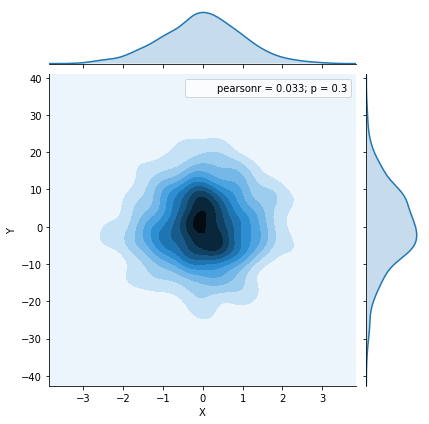

In [30]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before
# label X-axis 'X', label y-axis 'Y'
# pass argument kind='kde'
sns.jointplot('X','Y',dframe,kind='kde')